<a href="https://colab.research.google.com/github/UniversalUser/SC_ModeloAgentes/blob/master/libreta_de_pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -r modulos
!git clone https://github.com/UniversalUser/SC_ModeloAgentes.git modulos
!pip install mesa

Cloning into 'modulos'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 123 (delta 45), reused 73 (delta 24), pack-reused 0
Receiving objects: 100% (123/123), 8.56 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [0]:
from mesa import Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from random import choices, seed
from math import sqrt
seed(920204)

class Modelo(Model):
    #Algunas constantes
    SUCEPTIBLE = 0
    EXPUESTO = 1
    INFECTADO = 2
    RECUPERADO = 3
    salud_to_str={0:'Suceptible', 1:'Expuesto', 2:'Infectado', 3:'Recuperado'}
    pp_dia = 1 ## Son los pasos dados por dia simulado

    def __init__(self, N, city_object, agent_object, ind_attrs):
        super().__init__()
        self.num_ind = N
        self.city_object = city_object
        self.agent_object = agent_object
        self.ind_attrs = ind_attrs
        self.schedule = RandomActivation(self)
        self.generar_espacio()
        
        ## Se define el grid que se representará en la 
        self.grid = self.ciudad.nodes['ciudad']['espacio']
        self.datacollector = DataCollector(
            model_reporters = {'Suceptibles': self.conteo_func(self.SUCEPTIBLE),
                               'Expuestos': self.conteo_func(self.EXPUESTO),
                               'Infectados': self.conteo_func(self.INFECTADO),
                               'Recuperados': self.conteo_func(self.RECUPERADO)})
        self.conteo_instantaneo = [0,0,0,0]
    
    def generar_espacio(self):
        self.ciudad = self.city_object(self, self.agent_object)
        
        for ind in self.ciudad.generar_individuos(self.ind_attrs):
            self.schedule.add(ind)
        
        #Se crea el espacio donde estarán los individuos
        self.ciudad.crear_nodo('ciudad', tipo='ciudad',
                               ocupantes = self.ciudad.agentes_a_asignar,
                               tamano=110)
        
        #Se planta un infectado en la simulación
        for ind in choices(self.schedule.agents, k = 5):
            ind.salud = self.INFECTADO
            ind.asintomatico = False      

    
    def step(self):
        self.conteo()
        self.datacollector.collect(self)
        self.schedule.step()

    
    def conteo(self):
        #Una función para contar los casos actuales en la ciudad
        self.conteo_instantaneo = [0,0,0,0]
        for a in self.schedule.agents:
            self.conteo_instantaneo[a.salud] += 1
        return self.conteo_instantaneo

    def conteo_func(self, tipo):
        def contar(modelo):
            return modelo.conteo_instantaneo[tipo]
        return contar
    
    def correr(self, n_steps):
        bloques = int(n_steps*0.1)
        for i in range(n_steps):
            self.step()
            if int(i%bloques) == 0:
                print('%d%% ... '%(int(i/n_steps*100)), end = '')
        print('100%')


In [0]:
%matplotlib inline
from modulos.Ambiente.ambiente import Ciudad
from modulos.Individuos.individuo import Individuo_2

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


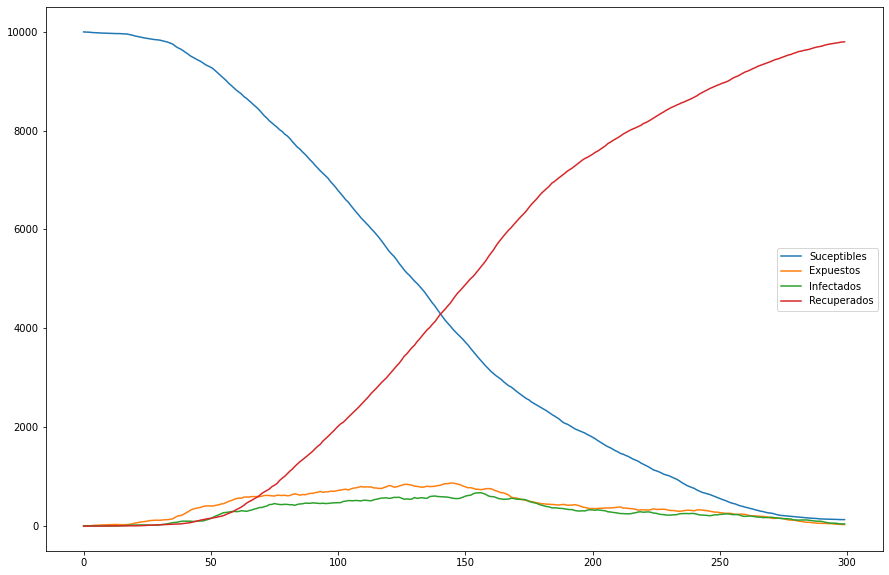

In [117]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 300

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 0,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


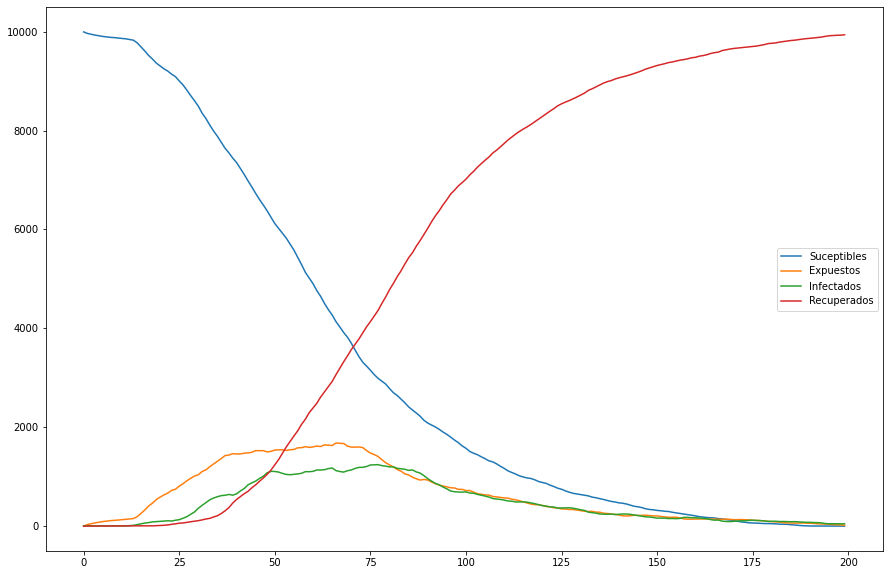

In [116]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 200

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


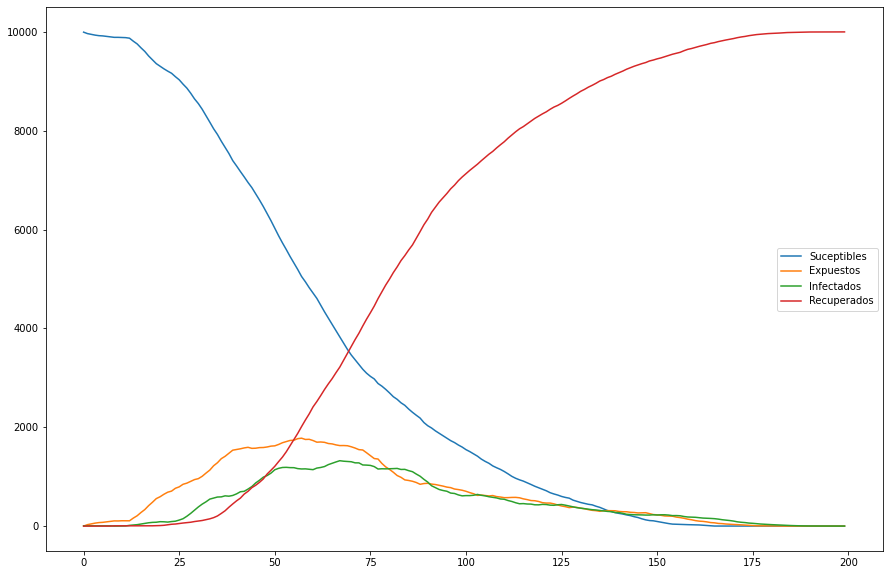

In [115]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 200

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': True,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


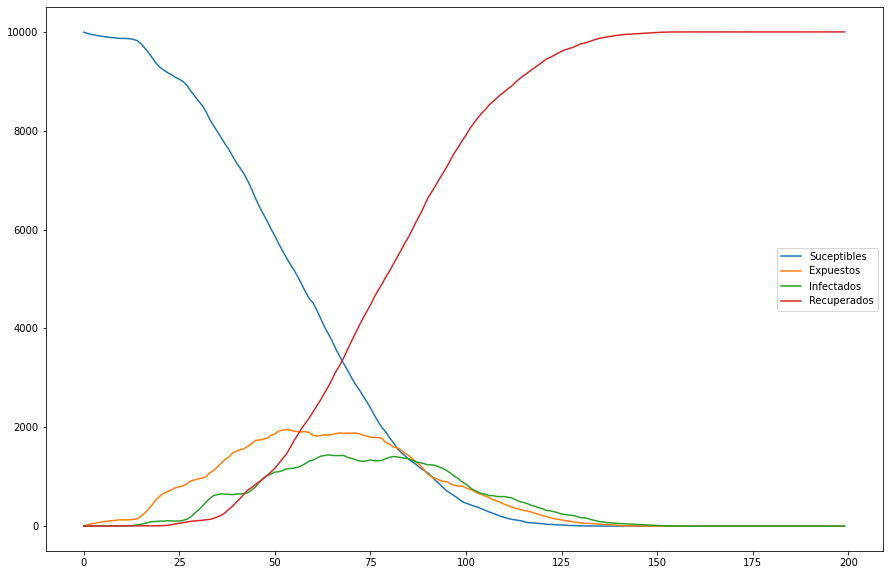

In [114]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 200

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':True,
                    'distancia_paso': 1,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));

0% ... 10% ... 20% ... 30% ... 40% ... 50% ... 60% ... 70% ... 80% ... 90% ... 100%


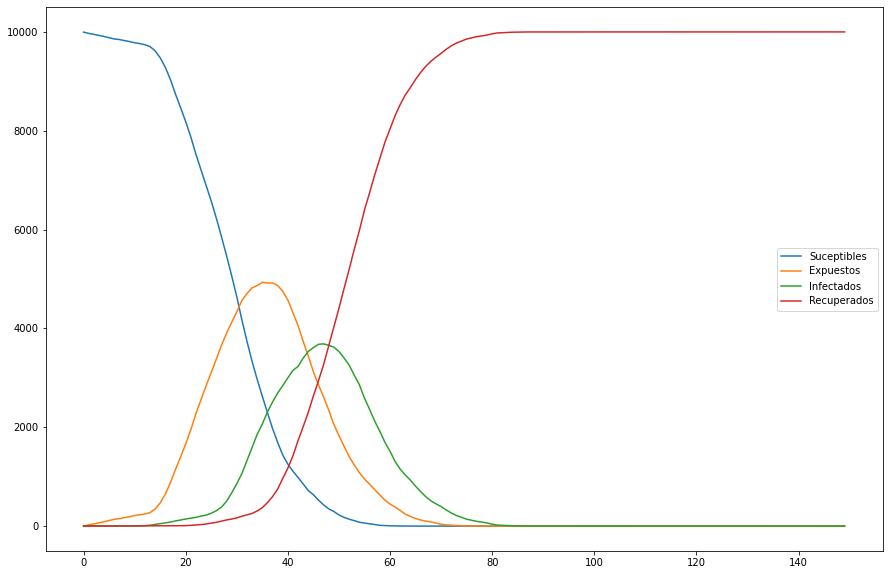

In [118]:
#Se define el número de agentes y de pasos
n_agentes = 10000
n_steps = 150

#Se predefinen los atributos de los agentes
attrs_individuos = {#Atributos de comportamiento
                    'evitar_agentes': False,
                    'evitar_sintomaticos':False,
                    'distancia_paso': 3,
                    #Atributos ante la enfermedad
                    'prob_contagiar': 0.9,
                    'prob_infectarse': 0.9,
                    'radio_de_infeccion': 1,
                    'pp_recuperar':8
                    }

modelo = Modelo(n_agentes, Ciudad, Individuo_2,
                ind_attrs = attrs_individuos)
modelo.correr(n_steps)
datos = modelo.datacollector.get_model_vars_dataframe()
datos.plot(figsize = (15,10));